In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
      return 1.0 / (1.0 + np.exp(-x))
def step(x):
      return x > 0

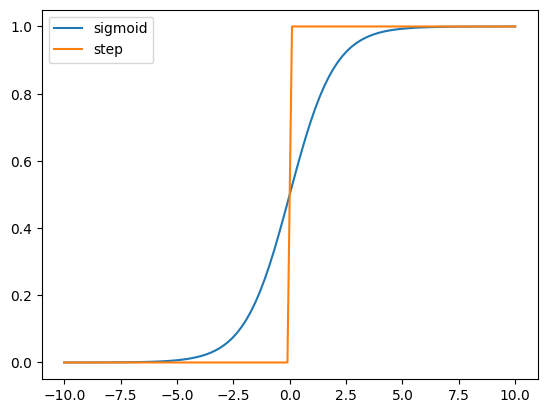

In [3]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.legend(['sigmoid', 'step'])

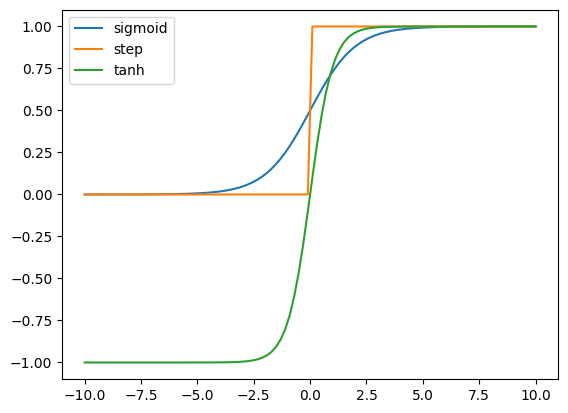

In [4]:
x = np.linspace(-10, 10, 100)
plt.plot(x, sigmoid(x))
plt.plot(x, step(x))
plt.plot(x, np.tanh(x))
plt.legend(['sigmoid', 'step', 'tanh'])

In [5]:
def relu(x):
    cond = x > 0
    return cond * x

Text(0.5, 1.0, 'relu')

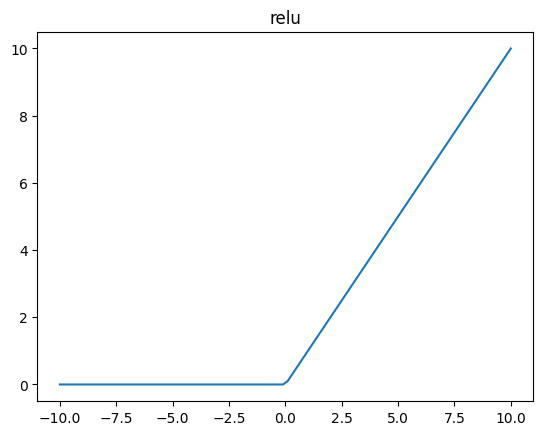

In [6]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.title('relu')

In [7]:
def softplus(x):
      return np.log1p(np.exp(x))

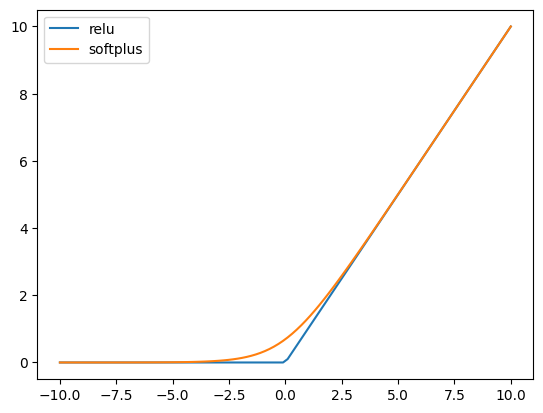

In [8]:
x = np.linspace(-10, 10, 100)
plt.plot(x, relu(x))
plt.plot(x, softplus(x))
plt.legend(['relu', 'softplus'])

In [9]:
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale * np.where(x>0.0, x, alpha * (np.exp(x) - 1))

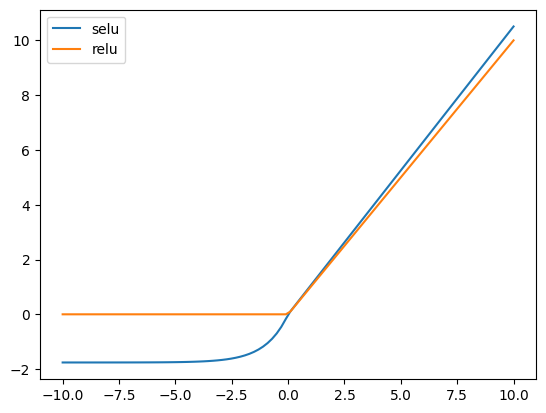

In [10]:
x = np.linspace(-10, 10, 100)
plt.plot(x, selu(x))
plt.plot(x, relu(x))
plt.legend(['selu', 'relu'])

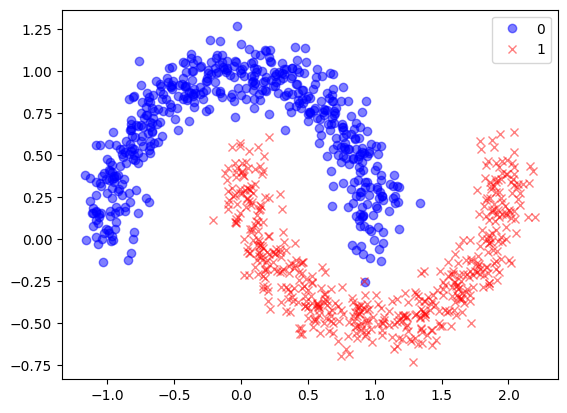

In [11]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [12]:
X.shape

(1000, 2)

In [13]:
X

array([[ 2.04271531,  0.51812416],
       [ 1.72033708, -0.13233804],
       [-0.26386729,  0.76382643],
       ...,
       [ 0.33823662, -0.43099924],
       [ 0.1269428 ,  0.09966251],
       [ 0.54241537, -0.47450809]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train

array([[ 1.76205245, -0.14570237],
       [ 0.55588423, -0.48846328],
       [-0.78700509,  0.29237568],
       ...,
       [ 0.87494615,  0.47891825],
       [ 0.02224454,  1.03198998],
       [ 0.66971953,  0.40652933]])

In [16]:
y_train

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

In [19]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=200, verbose=0)

2024-03-24 06:52:51.114170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [20]:
results = model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8502 - loss: 0.3008


In [21]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.837


319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


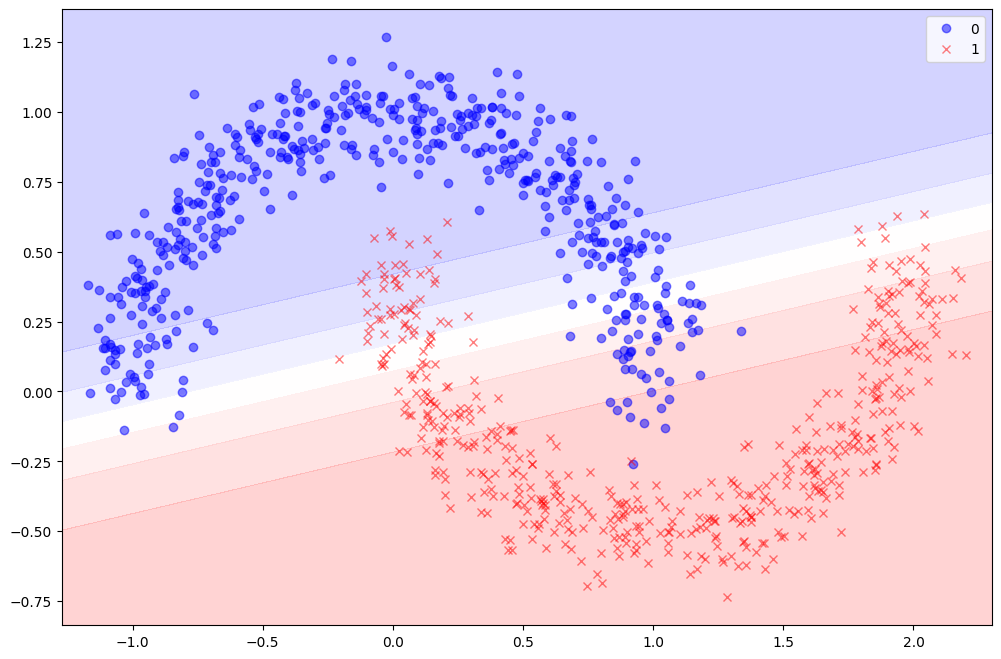

In [22]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
plot_decision_boundary(model, X, y)

In [24]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [27]:
model?

Signature:   model(*args, **kwargs)
Type:        Sequential
String form: <Sequential name=sequential_3, built=True>
File:        ~/.local/share/virtualenvs/zero-to-deep-learning-XkBXEB4b/lib/python3.11/site-packages/keras/src/models/sequential.py
Docstring:  
`Sequential` groups a linear stack of layers into a `Model`.

Examples:

```python
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))

# Note that you can also omit the initial `Input`.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet built):
model = keras.Sequential()
model.add(keras.layers.Dense(8))
model.add(keras.layers.Dense(4))
# model.weights not created yet

# Whereas if you specify an `Input`, the model gets built
# continuously as you are adding layers:
model = keras.Sequential()
model.add(keras.Input(shape=(16,)))
model.add(keras.layers.Dense(8))
len(model.weights)  # Returns "2"

# When using the del

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix
np.argmax(model.predict(X_train), axis=-1)
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
The Accuracy score on the Train set is:	0.519
The Accuracy score on the Test set is:	0.457


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step


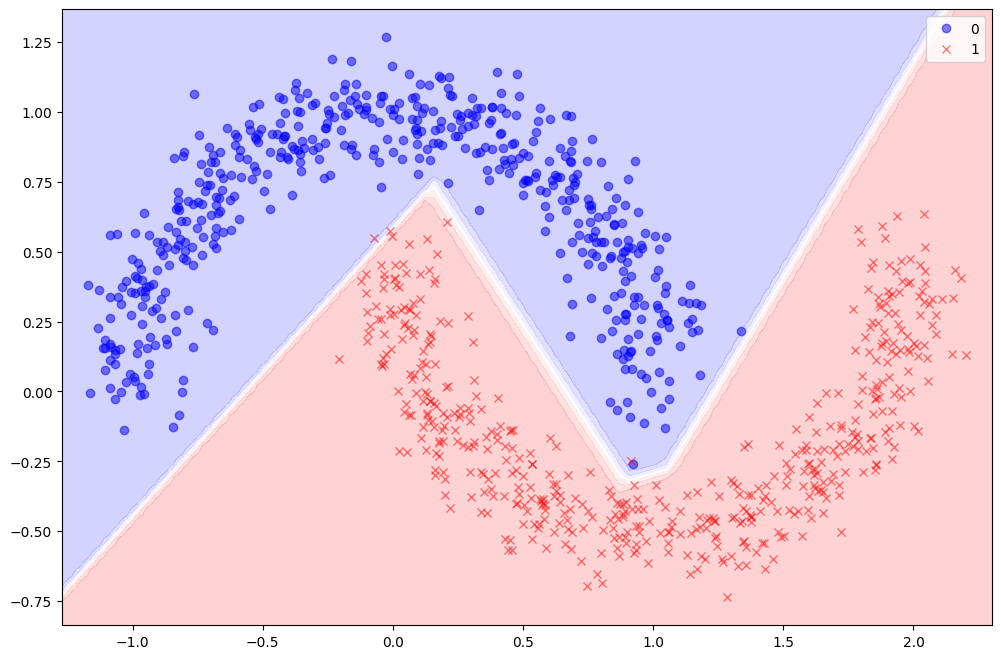

In [32]:
plot_decision_boundary(model, X, y)

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


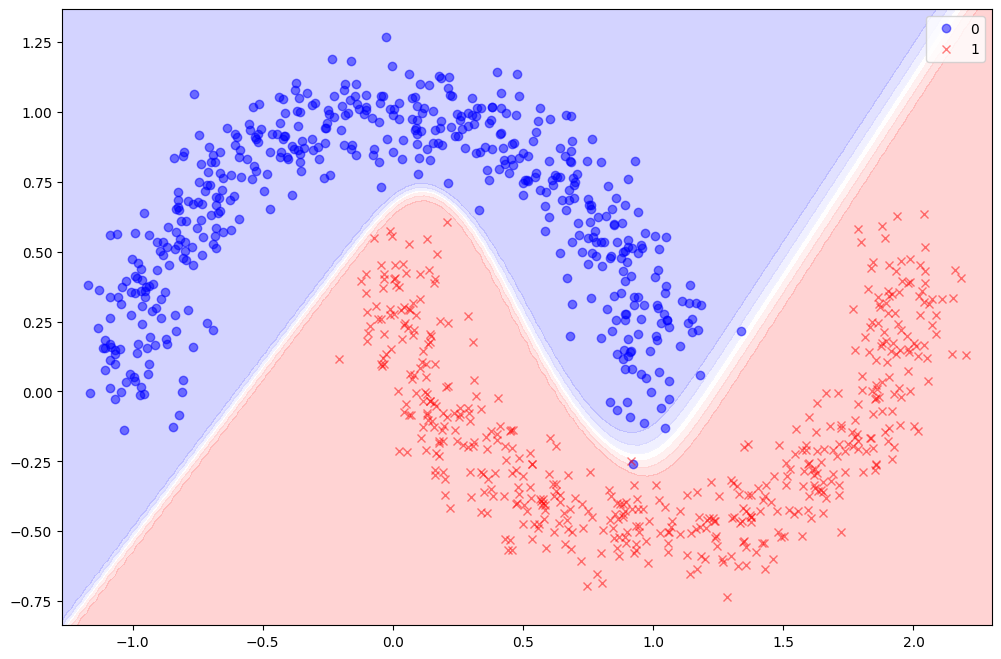

In [34]:
model = Sequential()
model.add(Dense(4, input_dim=2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, verbose=0)

plot_decision_boundary(model, X, y)

In [35]:
y_train_pred = np.argmax(model.predict(X_train), axis=-1)
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
The Accuracy score on the Train set is:	0.519
The Accuracy score on the Test set is:	0.457


In [36]:
df = pd.read_csv('./data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [37]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [39]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [40]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [41]:
from keras.utils import to_categorical
y_cat = to_categorical(y)
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,test_size=0.2, random_state=0, stratify=y)

In [43]:
model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

/Users/drujensen/.local/share/virtualenvs/zero-to-deep-learning-XkBXEB4b/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.fit(X_train, y_train, validation_split=0.1, epochs=30)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.3816 - loss: 2.0378 - val_accuracy: 0.7500 - val_loss: 1.4593
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6744 - loss: 1.7232 - val_accuracy: 0.7500 - val_loss: 0.8753
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6735 - loss: 0.9632 - val_accuracy: 0.2500 - val_loss: 1.2735
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5088 - loss: 0.8572 - val_accuracy: 0.8333 - val_loss: 0.4460
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6854 - loss: 0.5201 - val_accuracy: 0.7500 - val_loss: 0.4438
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7627 - loss: 0.4539 - val_accuracy: 0.5000 - val_loss: 0.5818
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7231 - loss: 0.4405 - val_accuracy: 0.8333 - val_loss: 0.4267
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8005 - loss: 0.4209 - val_accuracy: 0.8333 - val_loss: 0.3693


In [45]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[9.93019640e-01, 6.97843404e-03, 1.91685149e-06],
       [5.79888746e-03, 6.10205650e-01, 3.83995414e-01],
       [9.69180405e-01, 3.07968855e-02, 2.28029894e-05],
       [2.38257606e-04, 2.70352155e-01, 7.29409516e-01],
       [9.85884607e-01, 1.41086606e-02, 6.68930488e-06],
       [6.48590736e-03, 6.16141260e-01, 3.77372861e-01],
       [1.07668013e-04, 1.31213531e-01, 8.68678689e-01],
       [9.80861127e-01, 1.91242024e-02, 1.46167986e-05],
       [9.74106729e-01, 2.58678850e-02, 2.52810933e-05],
       [4.12799343e-02, 7.86561072e-01, 1.72158912e-01],
       [8.34212733e-06, 4.16220687e-02, 9.58369553e-01],
       [1.79848969e-02, 7.34160721e-01, 2.47854397e-01],
       [3.76273319e-03, 5.21015942e-01, 4.75221336e-01],
       [6.84008701e-05, 1.13154650e-01, 8.86776924e-01],
       [3.37193049e-02, 8.25891972e-01, 1.40388757e-01],
       [5.76613820e-05, 9.29657072e-02, 9.06976640e-01],
       [2.28747358e-05, 5.23914397e-02, 9.47585642e-01],
       [1.62790921e-02, 7.54328

In [46]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [48]:
cm = confusion_matrix(y_test_class, y_pred_class)
pd.DataFrame(cm, index = target_names, columns = ['pred_'+c for c in target_names])

,pred_setosa,pred_versicolor,pred_virginica
setosa,10,0,0
versicolor,0,10,0
virginica,0,0,10


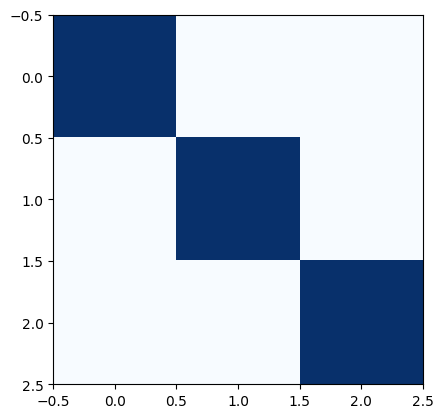

In [49]:
plt.imshow(cm, cmap='Blues')

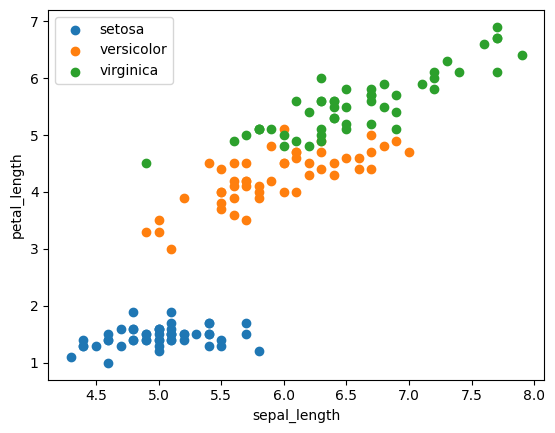

In [50]:
plt.scatter(X.loc[y==0,'sepal_length'], X.loc[y==0,'petal_length'])
plt.scatter(X.loc[y==1,'sepal_length'], X.loc[y==1,'petal_length'])
plt.scatter(X.loc[y==2,'sepal_length'], X.loc[y==2,'petal_length'])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(target_names)

In [51]:
import seaborn as sns

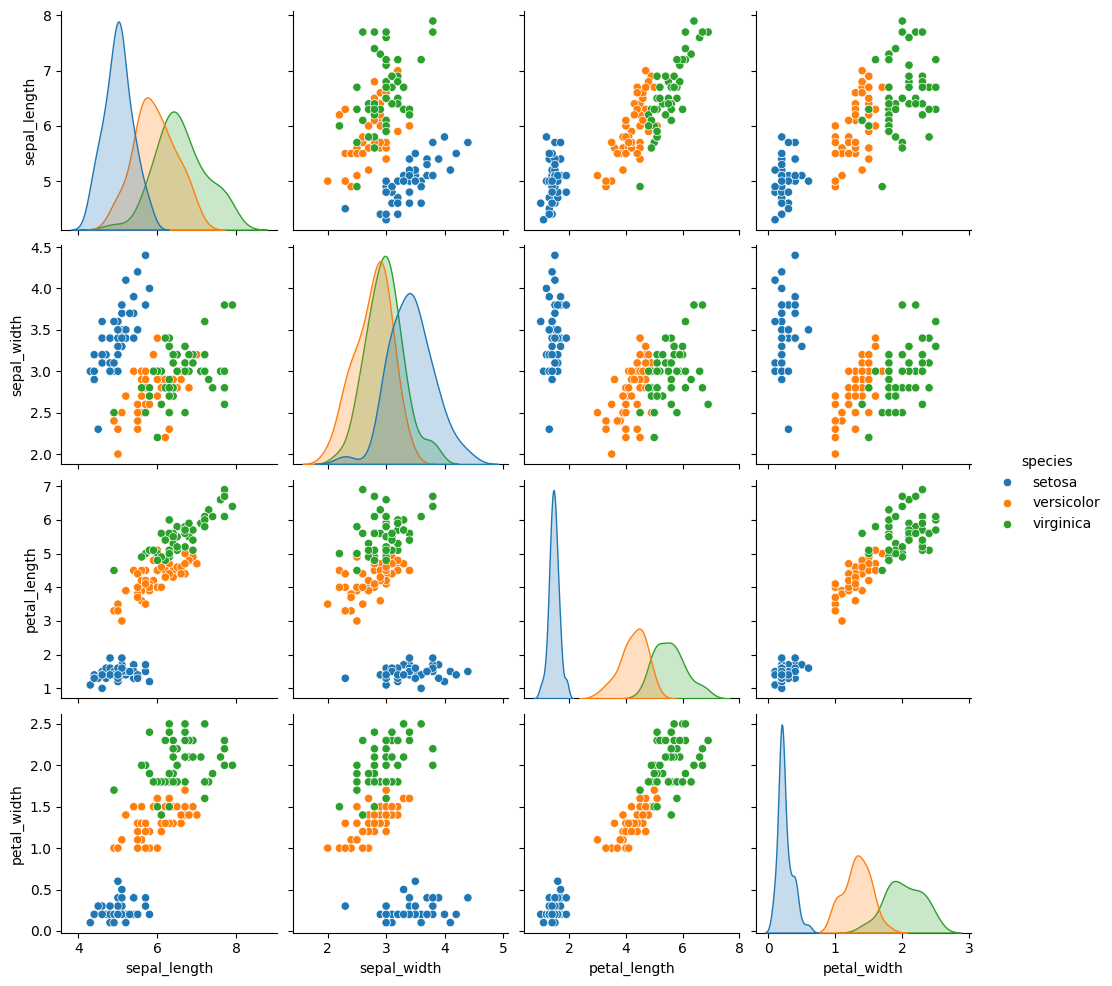

In [52]:
sns.pairplot(df, hue="species")